In [1]:
# We will use the following packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Data_Projects/ML-Project/pmx_gasoline_theft_prediction'

/content/drive/MyDrive/Data_Projects/ML-Project/pmx_gasoline_theft_prediction


In [23]:
# Importing our data

df_thefts_PMX = pd.read_excel("data/df_thefts_PMX_final_v2.xlsx", converters={'CVEGEO' : str})



In [24]:
social_variables = df_thefts_PMX.columns.drop(['Mun_code', 'Susceptible'])
social_variables

Index(['Pipe_intersec', 'Gas_stations', 'Gas_price', 'Confront_events', 'IRS',
       'Homic_rate', 'SBASC', 'POB_6_16_NEB', 'POB_16_EBI', 'NO_SS', 'OVPT',
       'NO_SANIT', 'OVSAE', 'NO_DREN', 'NO_ELECT', 'NO_LAVA', 'No_REFRI'],
      dtype='object')

In [26]:
#Fill 0s in Gas_prices NaN values

for key in social_variables:
  df_thefts_PMX[key] = df_thefts_PMX[key].fillna(0)

df_thefts_PMX.head()

,Mun_code,Pipe_intersec,Gas_stations,Gas_price,Confront_events,IRS,Homic_rate,Susceptible,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI
0,1001,22,1.35,17.78,0,-1.3456,5.41,1,1.887423,3.914694,23.463147,15.751315,0.558267,0.434323,0.539714,0.405613,0.185406,13.135097,4.976815
1,1002,3,21.29,17.93,0,-0.8732,4.13,0,4.053829,3.934379,38.616333,8.822640,1.593414,4.890338,1.171607,4.973795,0.997579,21.077503,13.729702
2,1004,5,76.76,17.85,0,-1.0391,6.20,0,3.835153,3.753315,30.835403,8.218243,1.335823,2.530502,0.671326,1.624260,0.697120,21.213440,11.657586
3,1005,5,18.80,17.84,0,-1.1825,4.83,0,2.887218,4.803344,30.812283,16.580066,1.043769,0.840948,0.911164,0.748003,0.439924,14.073904,6.988933
4,1006,8,31.76,17.83,0,-1.1859,4.26,1,3.120712,3.307964,28.773867,13.255280,0.696114,1.460176,1.117155,1.157367,0.667693,15.313592,8.822952


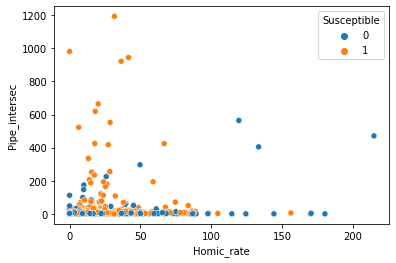

In [27]:
# scatter plot using 

sns.scatterplot(x = "Homic_rate", 
                y = "Pipe_intersec", 
                hue = "Susceptible", data = df_thefts_PMX);

In [28]:
# We will now set data and target 
X = df_thefts_PMX.drop(columns="Susceptible")
y = df_thefts_PMX["Susceptible"]
X.columns

Index(['Mun_code', 'Pipe_intersec', 'Gas_stations', 'Gas_price',
       'Confront_events', 'IRS', 'Homic_rate', 'SBASC', 'POB_6_16_NEB',
       'POB_16_EBI', 'NO_SS', 'OVPT', 'NO_SANIT', 'OVSAE', 'NO_DREN',
       'NO_ELECT', 'NO_LAVA', 'No_REFRI'],
      dtype='object')

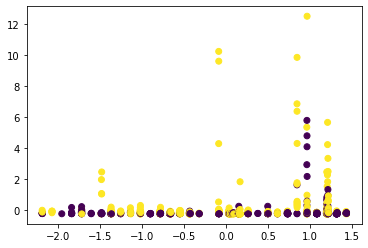

In [29]:
# Preprocessing the data

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

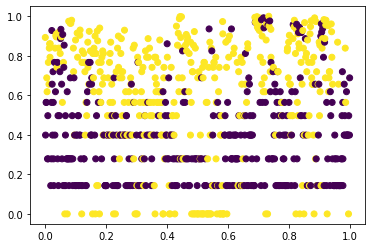

In [30]:
# QuantileTransformer

from sklearn.preprocessing import QuantileTransformer

X_new2 = QuantileTransformer(n_quantiles = 500).fit_transform(X)
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y);

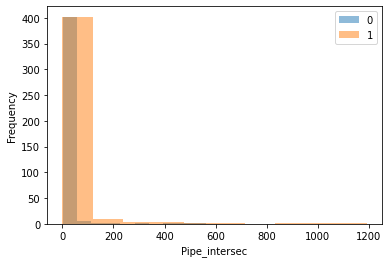

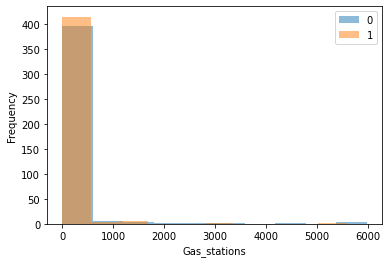

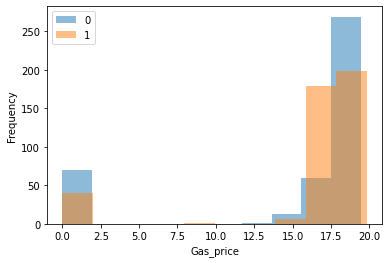

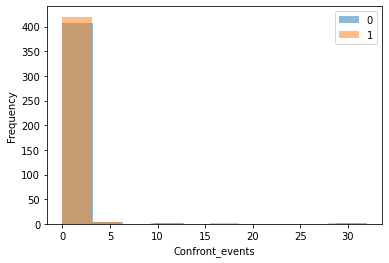

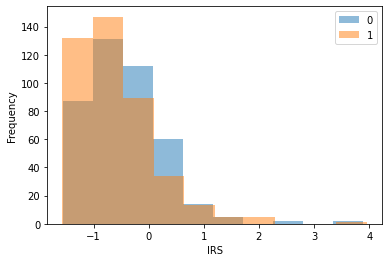

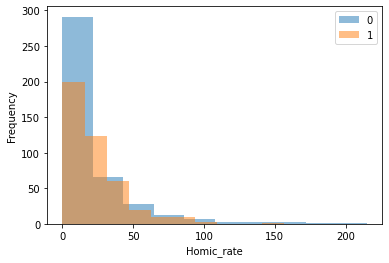

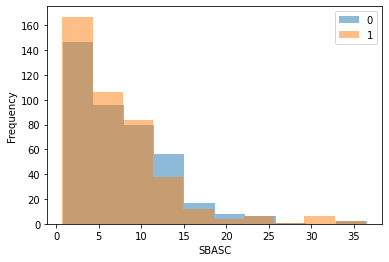

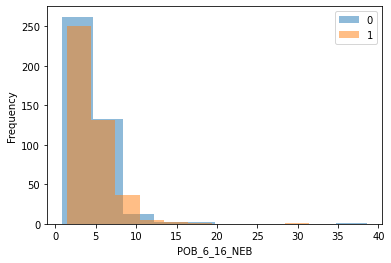

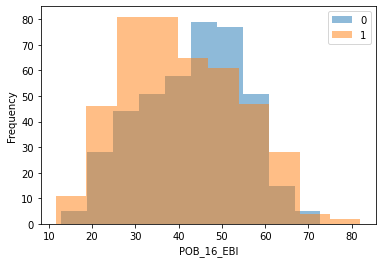

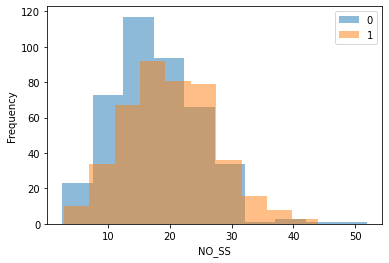

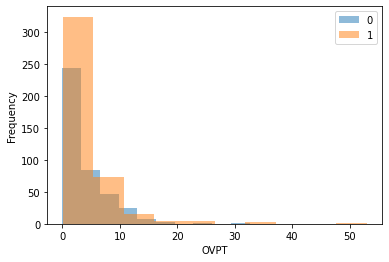

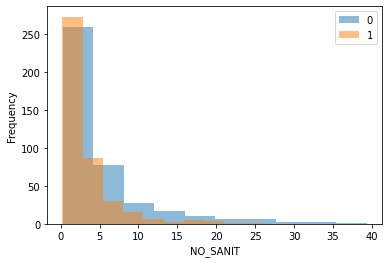

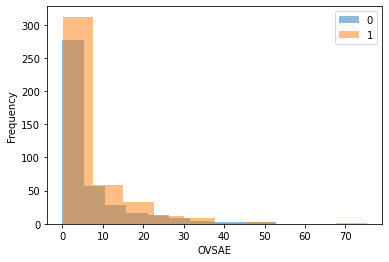

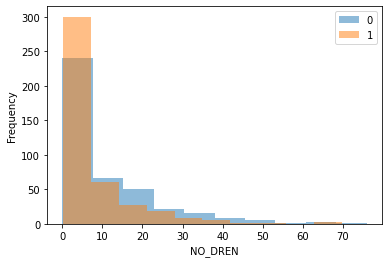

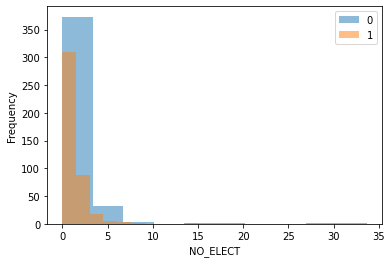

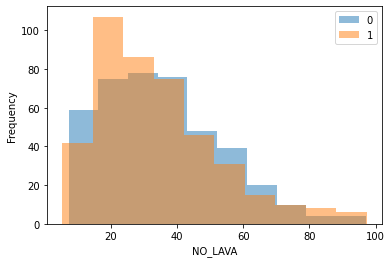

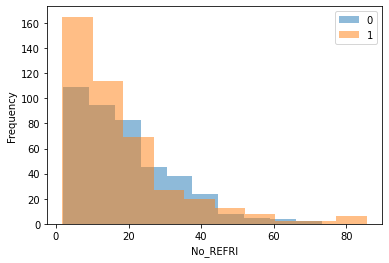

In [31]:
#Check the variables distribution - histogram

# Plot one histogram per variable

for variable_name in df_thefts_PMX[['Pipe_intersec', 'Gas_stations', 'Gas_price',
                                    'Confront_events', 'IRS', 'Homic_rate', 'SBASC', 'POB_6_16_NEB',
                                    'POB_16_EBI', 'NO_SS', 'OVPT', 'NO_SANIT', 'OVSAE', 'NO_DREN',
                                    'NO_ELECT', 'NO_LAVA', 'No_REFRI']]:
                                   plt.figure()
                                   # plot the histogram for each specie
                                   df_thefts_PMX.groupby("Susceptible")[variable_name].plot.hist(alpha=0.5, legend=True)
                                   plt.xlabel(variable_name)

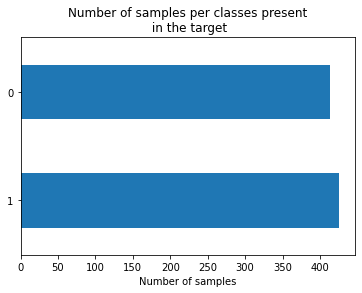

In [32]:
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

In [33]:
# Set up training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, test_size=0.3)

In [38]:
# Preprocessing the data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('model', LogisticRegression())
                 ])

#pipe.fit(X_train, y_train)
classifier = pipe.fit(X_train, y_train)





In [39]:
# Here we predict using our unseen data (X_test)
#classifier = LogisticRegression()
target_predicted = pipe.predict(X_test)
target_predicted

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [40]:
y_test

654    1
275    1
327    1
285    0
280    0
      ..
689    1
699    1
692    0
250    1
124    1
Name: Susceptible, Length: 252, dtype: int64

In [41]:
accuracy = accuracy_score(y_test, target_predicted)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.57


In [42]:
classifier.score(X_test, y_test)

0.5714285714285714

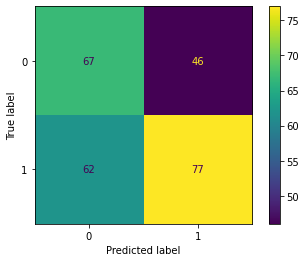

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 

In [44]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, target_predicted)
recall = recall_score(y_test, target_predicted)

print(f"Precision score: {precision:.2f}")
print(f"Recall score: {recall:.2f}")

Precision score: 0.63
Recall score: 0.55


In [45]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
print(f"Accuracy of the dummy classifier: "
      f"{dummy_classifier.score(X_test, y_test):.3f}")

Accuracy of the dummy classifier: 0.448


In [46]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.2f}")

Balanced accuracy: 0.57
